 STATISTICS FOR DATA SCIENCE

Data Source- UCI`s Machine Learning Repository

In [56]:
file=open('adult.data','r')
def char_int(a):
    if a.isdigit(): return int(a)
    else: return 0
    
data=[]
for line in file:
    data1=line.split(', ')
    if len(data1)==15:
        data.append([char_int(data1 [0]),data1 [1],char_int(data1 [2]),data1 [3],
                    char_int(data1 [4]),data1 [5],data1 [6],data1 [7],
                    data1 [8],data1 [9],char_int(data1 [10]),char_int(data1 [11]),
                    char_int(data1 [12]),data1 [13],data1 [14]
                    ])

In [57]:
print (data[1:2])

[[50, 'Self-emp-not-inc', 83311, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 13, 'United-States', '<=50K\n']]


In [58]:
import pandas as pd

In [59]:
df=pd.DataFrame(data)
df.columns=[
    'age','type_employer','fnlwgt',
    'education','education_num','marital',
    'occupation','relationship','race',
    'sex','captial_gain','capital_loss',
    'hr_per_week','country','income'
    
]

In [60]:
df.shape         # Shape gives exact number of data samples (in rows) & features (in columns)

(32561, 15)

In [61]:
# Let us count the no of items per country

counts=df.groupby('country').size()              
counts.head()


country
?           583
Cambodia     19
Canada      121
China        75
Columbia     59
dtype: int64

In [62]:
#Lets split people according to their gender
m1=df[df.sex=='Male']      

In [63]:
m1

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,captial_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K\n
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K\n
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K\n


In [64]:
# High-income professionals seperated by sex

m11=df[(df.sex=='Male')&(df.income=='>50K\n')]            
fm=df[df.sex=='Female']
fm1=df[(df.sex=='Female')&(df.income=='>50K\n')]

EXPLORATORY DATA ANALYSIS- One of the main goals of EDA is to visualize and summarize the sample distribution, thereby
allowing us to make tentative assumptions about the populaiton distribution. 

SUMMARIZING THE DATA - For Categorical data, a simple tabulation of the frequency of each category is the best non-graphical
exploration for data analysis.



In [65]:
#For Ex:- What is the proportion of high-income professionals in our database?

df1=df[df.income=='>50K\n']
print(f"The rate of people with hig-income is:{int(len(df1)/float(len(df))*100)}'%'")
print(f"The rate of men with hig-income is:{int(len(m11)/float(len(m1))*100)}'%'")
print(f"The rate of female with hig-income is:{int(len(fm1)/float(len(fm))*100)}'%'")

The rate of people with hig-income is:24'%'
The rate of men with hig-income is:30'%'
The rate of female with hig-income is:10'%'


The quantitative characteristics of the population distribution of a quantitative variable are its mean,deviation, histograms,outliers etc. 

MEAN- Sum of Values divided by no of values

In [66]:
# Lets print Average Samples of Men & Women in our dataset

print(f"The Average age of the men is:{m1['age'].mean()}")                           
print(f"The Average age of the female is:{fm['age'].mean()}")
print(f"The Average age of the high-income men is:{m11['age'].mean()}")
print(f"The Average age of the high-income women is:{fm1['age'].mean()}")

The Average age of the men is:39.43354749885268
The Average age of the female is:36.85823043357163
The Average age of the high-income men is:44.62578805163614
The Average age of the high-income women is:42.125530110262936


1. Population Mean (is the mean of whole population) 
2. Sample Mean (is taken from the population) 

Sample Variace:- It describes the spread of the data 
Standard Deviation:- The square root of the mean 

In [67]:
# Let`s compute the mean and variance of hours per week of men and women in our dataset-work:

m1_mu=m1['age'].mean()
fm_mu=fm['age'].mean()
m1_var=m1['age'].var()
fm_var=fm['age'].var()
m1_std=m1['age'].std()
fm_std=fm['age'].std()
print(f"Stastistics of age for men\n   mean is : {m1_mu}\nvariance is :{m1_var}\n standard deviation is:{m1_std}\n")
print(f"Stastistics of age for women\n mean is:{fm_mu}\nvariance is:{fm_var}\nstandard deviation is:{fm_std}\n")



Stastistics of age for men
   mean is : 39.43354749885268
variance is :178.77375174530096
 standard deviation is:13.37063019252649

Stastistics of age for women
 mean is:36.85823043357163
variance is:196.3837063948037
standard deviation is:14.01369709943824



 #Sample Median - Stastistican median is defined as the value in the middle of the ordered list.
 
 #outlier- An item of data significatly different form the rest of the data.

In [68]:
# Median age of working men and women

m1_median=m1['age'].median()
fm_median=fm['age'].median()
print(f"Median age per men and women : {m1_median}{fm_median}")

#Median age of working men and women with high income
m1_median_age=m11['age'].median()
fm_median_age=fm1['age'].median()
print(f"Median age per men and women with high-income  : {m1_median_age}{fm_median_age}")

Median age per men and women : 38.035.0
Median age per men and women with high-income  : 44.041.0


<AxesSubplot:>

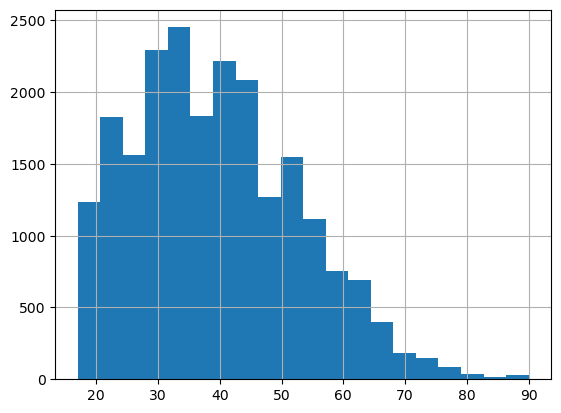

In [69]:
# MOST COMMON DISTRIBUTION IS A HISTOGRAM GRAPH
#LET US SHOW THE AGE OF THE WORKING MEN AND WOMEN SEPERATELY FROM THE ABOVE GIVEN DATA SET

m1_age=m1['age']
m1_age.hist ( histtype ='stepfilled', bins=20)

<AxesSubplot:>

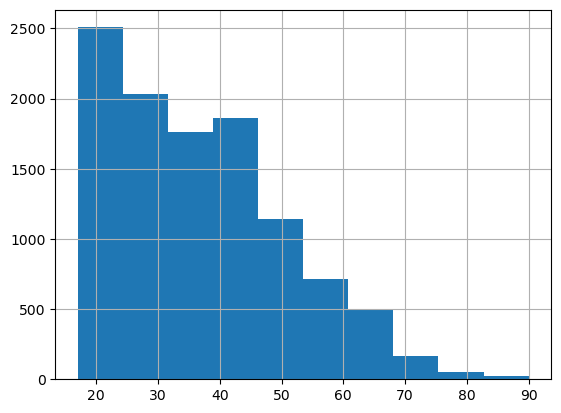

In [70]:
fm_age=fm['age']
fm_age.hist(histtype='stepfilled', bins=10)

<AxesSubplot:>

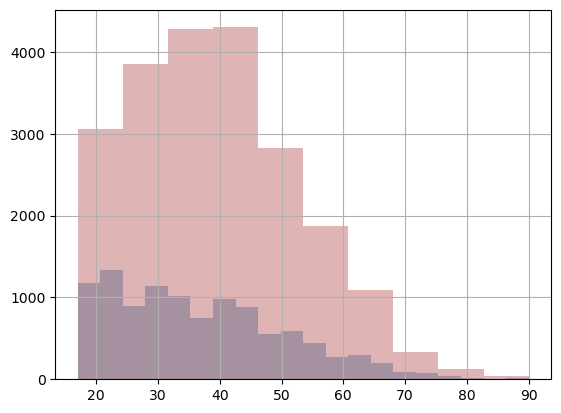

In [71]:
# If we want to compare them then We can plot them overlapping in a single graph as below

import seaborn as sns

fm_age=fm['age']
fm_age.hist(histtype='stepfilled', alpha=0.5,bins=20)

m1_age=m1['age']
m1_age.hist ( histtype ='stepfilled', alpha=0.5, color = sns.desaturate('indianred',0.75),bins=10)

Histogram of the age of the working men is in (Ochre) and women is in (Violet)
    

Note:- We are Visualizing the absolute values of number of people in our dataset according to their age. As a side effect, 
    
     We can see there are many more men in these conditions than women.
     We can normalize the frequencies of the histogram by dividing/normalizing by n, number of samples. The normalized histogram 
    is called as Probability Mass Function (PMF)

<AxesSubplot:>

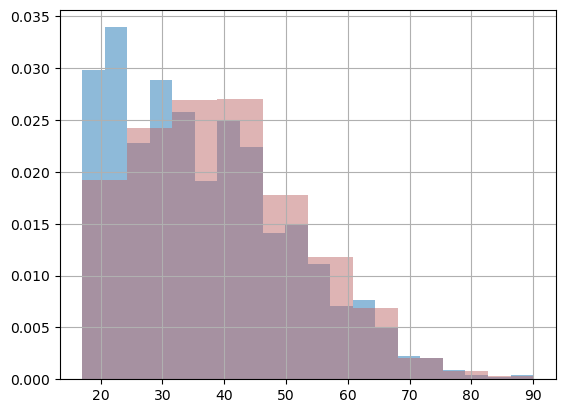

In [72]:
fm_age=fm['age']
fm_age.hist(density=True, histtype='stepfilled', alpha=0.5,bins=20)

m1_age=m1['age']
m1_age.hist (density=True,  histtype ='stepfilled', alpha=0.5, color = sns.desaturate('indianred',0.75),bins=10)

Histogram of the age of working men (in ochre) and women in (Blue) and their intersection (violet) after Normalization

We can observe comparable range of individuals(men and women)

The Cumulative Distribution Function (CDF), or just Distribution Function describes the probability that
a real- valued random variable X with a given probability distribution will be found to have a value less than or equal to x.


<AxesSubplot:>

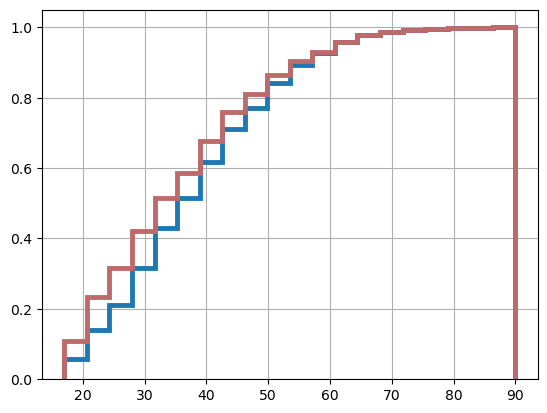

In [73]:
# CDF of the age distributions of men and women

m1_age=m1['age']
m1_age.hist (density=True,  histtype ='step', cumulative=True, linewidth=3.5,bins=20)

fm_age=fm['age']
fm_age.hist(density=True, histtype='step', cumulative=True,linewidth=3.5,color=sns.desaturate('indianred',0.75),bins=20)

Outlier Treatment

Outliers are data samples with a value that is far from centraltendency

To detect outliers

computing samples that are far from median
computin samples whose values exceed the mean by 2 to 3 standard deviations

We can see in our dataset minimum age is 17 and the maximum is 90 years. we can consider some of these samples are due to errors
or not representable. Applying domain knowledge we focus of median age 37 in our case and upto 72 and down to 22 year old, and 
we consider the rest as outliers.

In [74]:
df2=df.drop(df.index[(df.income=='>50K\n')&
                    (df['age']>df['age'].median()+35)&
                    (df['age']>df['age'].median()-15)
                    ]
           )
m11_age=m11['age']
fm1_age=fm1['age']

m12_age=m11_age.drop(m11_age.index[
    (m11_age > df ['age'].median()+35) &
    (m11_age >df ['age'].median()-15)])
fm2_age=fm1_age.drop(fm1_age.index[
    (fm1_age > df ['age'].median()+35) &
    (fm1_age >df ['age'].median()-15)])


We can check how the mean and median changed once the data were cleaned 

In [75]:
mu2ml=m12_age.mean()
std2ml=m12_age.std()
md2ml=m12_age.median()
mu2fm=fm2_age.mean()
std2fm=fm2_age.std()
md2fm=fm2_age.median()

print(f""" Men Stastics: \n Mean:{mu2ml}, Std:{std2ml}, Median:{md2ml},Min:{m12_age.min()}, Max: {m12_age.max()}\n\n Women Statistics:
 Mean:{mu2fm},Std:{std2fm},Median:{md2fm},Min:{fm2_age.min()}, Max: {fm2_age.max()}""")

 Men Stastics: 
 Mean:44.317982123920615, Std:10.019749857171412, Median:44.0,Min:19, Max: 72

 Women Statistics:
 Mean:41.877028181041844,Std:10.036441807343714,Median:41.0,Min:19, Max: 72


<AxesSubplot:>

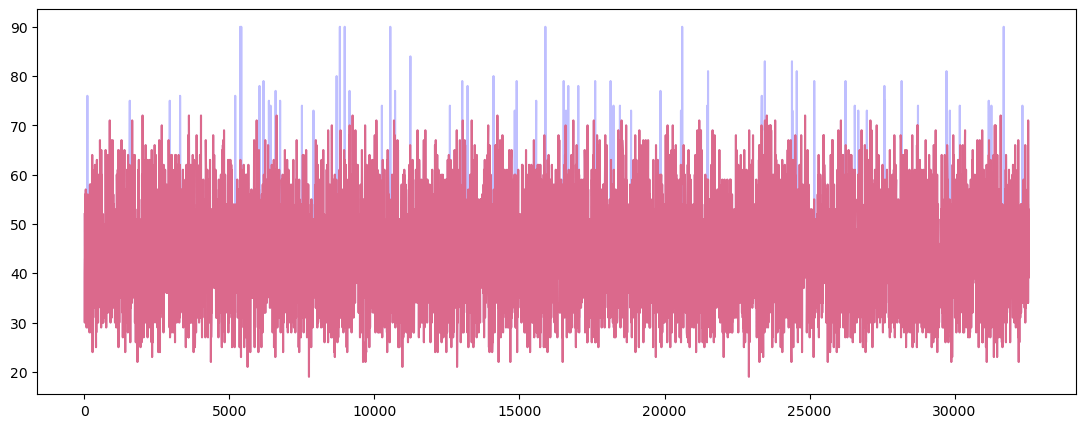

In [76]:
# Let us visualize how many outliers are removed from the whole data by:
import matplotlib.pyplot as plt
plt.figure(figsize=(13.4,5))
df.age[(df.income=='>50K\n')].plot(alpha=0.25, color='blue')
df2.age[(df2.income=='>50K\n')].plot(alpha=0.45, color='red')

The red shows the cleaned data with out considered outliers (in blue)